In [39]:
# Python 2 and 3 compatibility
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')
import pandas as pd
%pylab inline
import seaborn as sns
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


## <font color='green'>Review. Часть 1</font>

-       описание набора данных и признаков (на понятном русском, желательно с картинками) - 1 балл

<font color='green'>1 балл. 
</font>

-       первичный анализ признаков  - 3 балла

<font color='green'>2 балла. <br> <br>Все действия стоит пояснять, например если вы делаете data.describe(), то нужно пояснить, что вы увидели, к какому результату пришли.
Было немного сказано о выбросах, как их будете устранять?
</font>

-       первичный визуальный анализ признаков  - 3 балла

<font color='green'>2,5 балла. <br> 
Графиков построено много, но лишь некоторые результаты прокомментированы.
</font>

-       если пришли к каким-то "инсайтам", обнаружили закономерности - изложите  - 3 балла

<font color='green'>2,5 балла <br> 
В конце лучше прорезюмировать найденные зависимости в данных.</font>

## <font color='green'>Итого: 8 баллов (округл.)</font>

### Данные по моделированию референциального выбора
 

Один из важнейших процессов, участвующих в порождении речи, — референциальный выбор, то есть выбор языкового выражения при упоминании лица или объекта. Референциальный выбор зависит от большого числа одновременно действующих факторов. В данном проекте предлагается модель, описывающая референциальный выбор в аннотированном корпусе английских текстов.

Рассмотрим предложение: "Петя пошел гулять. Он надел шапку". 


В данном примере два референцияльных выражения - "Петя" и "он", они относят нас к одному и тому же референту - Пете, который является объектом внеязыковой действительности. При этом, "Петя" в данном случае является антецедентом, а "он" - анафором. 

Если некоторые референты встречаются в речевом отрезке несколько раз, то тогда можно говорить об отношении кореферентности – симметричном отношении между двумя или более референциальными выражениями в речи, которые отсылают к одному и тому же референту. Референциальное выражение, кореферентное данному и непосредственно предшествующее ему в тексте, называется антецедентом, а само референциальное выражение называется анафором.

От чего зависит то, какое референциальное выражение (существительное или местоимение) мы будем использовать в речи? Для выполнения проекта была поставлена задача построить модель, которая могла бы по признакам слов, извлеченных из корпуса, спрогнозировать, какое референциальное выражение будет употреблено.

Хотелось бы отметить, что в своей работе я буду использовать различные признаки, которые были автоматически извлечены из корпуса MoRA 2015 (прежнее название RefRhet), специально созданного и аннотированного группой исследователей из МГУ и НИУ ВШЭ для изучения референциального выбора. Эти данные носят чисто исследовательский характер, и по соглашению с участниками проекта, я бы хотела попросить не выкладывать данные в открытый доступ. 

Примечание: Корпус - подобранная и обработанная по определённым правилам совокупность текстов, используемых в качестве базы для исследования языка. Они используются для статистического анализа и проверки статистических гипотез, подтверждения лингвистических правил в данном языке. (https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D1%80%D0%BF%D1%83%D1%81_%D1%82%D0%B5%D0%BA%D1%81%D1%82%D0%BE%D0%B2)

### Описание признаков

<li>fFileName - имя файла в корпусе
<li>AnaphorID - ID анафора
<li>AntecedentID - ID антецедента
<li>coreference_set_name - номер кореферентной цепочки, в которую входят анафор и антецедент
<li>animacy - одушевленность референта (имеет значения: collective, inanimate, animate)
<li>gender - грамматический род, только для одушевленных референтов (имеет значения: masc (мужской), fem (женский), mixed (смешанный - либо пол референта неизвестен, например Judge Smith, либо известно, что референциальное выражение в форме множественного числа обозначает нескольких референтов разного пола))
<li>person - лицо (имеет значения: 1, 2, 3)
<li>number - число (имеет значение: sg (единственное), pl (множественное))
<li>ant_gramm_role - роль антецедента в предложении (имеет значения: sbj(подлежащее), dir_obj(прямое дополнение), indir_obj(непрямое дополнение), obl(косвенное дополнение, т.е. дополнение с предлогом), attribute(атрибут, например, the [Manhattan] prosecutor), possessor(посессор, например, with [its] durability), specification(уточнение))
<li>ant_phrase_type - фразовый тип антецедента (имеет значения: беспредложная именная группа (np), например John, he, John's, his; предложная группа (pp), например of John, to him)
<li>ant_animacy - одушевленность антецедента
<li>ant_pro_type - если антецедент выражен местоимением, то в этом признаке учитывается его тип (имеет значения: no (если антецедент не выражен местоимением), личные местоимения (pers_pro), притяжательные (посессорные) местоимения (poss_pro), указательные местоимения (dem_pro), относительные местоимения (rel_pro), нулевые местоимения (zero_pro))
<li>ant_descr_type - типы дескрипций (имеет значение: дескрипция с неопределенным артиклем (a_descr), дескрипция с определенным артиклем (the_descr), указательная дескрипция (dem_descr))
<li>ant_numeral - наличие количественного числительного (имеет значения: yes, no)
<li>ant_pn_type - типы имен собственных (имеет значение: только имя без фамилии (first), фамилия (last),  имя и фамилия (first_last),  инициал и фамилия (abbr_last),  полное имя собственное для неодушевленных референтов (full), аббревиатура (abbr))
<li>Words_Dist - расстояние от анафора до антецедента в словах
<li>Markable_Dist - расстояние от анафора до антецедента в маркабулах (маркабула - это единица разметки корпуса)
<li>Sent_Dist - расстояние от анафора до антецедента в клаузах
<li>Ritorical_Dist - риторическое расстояние от анафора до антецедента
<li>Real_Sent_Dist - расстояние от анафора до антецедента в предложениях
<li>para_Dist - расстояние от анафора до антецедента в абзацах
<li>res_form - форма анафора, представленная в корпусе (propername_description - имя собственное, pronoun_ - местоимение). Признак, который должен предсказывать алгоритм машинного обучения.

В значении каждого признака может встретиться метка 'unspec'. Это значит, что в этом случае отпределить значение конкретного признака невозможно. 

In [40]:
ref_df =  pd.read_csv(r'D:\ref_data_2class_classification.csv',  sep=';',
                      converters={'Ritorical_Dist': lambda x: float (x.replace(",","."))}, encoding='utf-8')

In [41]:
ref_df.head(3).T

,0,1,2
fFileName,0606-2,0606-2,0606-2
AnaphorID,markable_57,markable_20000440,markable_20000502
AntecedentID,markable_100006,markable_65,markable_43
coreference_set_name,set_21,set_32,set_27
animacy,collective,inanimate,inanimate
gender,?,?,?
person,3,3,3
number,sg,sg,sg
ant_gramm_role,possessor,dir_obj,sbj
ant_phrase_type,np,np,np


In [42]:
print(ref_df.shape)
print(ref_df.columns)

(2248, 23)
Index(['fFileName', 'AnaphorID', 'AntecedentID', 'coreference_set_name',
       'animacy', 'gender', 'person', 'number', 'ant_gramm_role',
       'ant_phrase_type', 'ant_animacy', 'ant_pro_type', 'ant_descr_type',
       'ant_numeral', 'ant_attributive', 'ant_pn_type', 'Words_Dist',
       'Markable_Dist', 'Sent_Dist', 'Ritorical_Dist', 'Real_Sent_Dist',
       'para_Dist', 'res_form'],
      dtype='object')


In [43]:
ref_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
fFileName,2248,63,1154-2,154,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AnaphorID,2248,1353,markable_11,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AntecedentID,2248,1370,markable_11,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
coreference_set_name,2248,777,set_156,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN
animacy,2248,6,collective,882,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,2248,5,?,1614,NaN,NaN,NaN,NaN,NaN,NaN,NaN
person,2248,6,3,2196,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number,2248,5,sg,1842,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ant_gramm_role,2248,10,sbj,988,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ant_phrase_type,2248,5,np,1755,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Корреляции признаков**

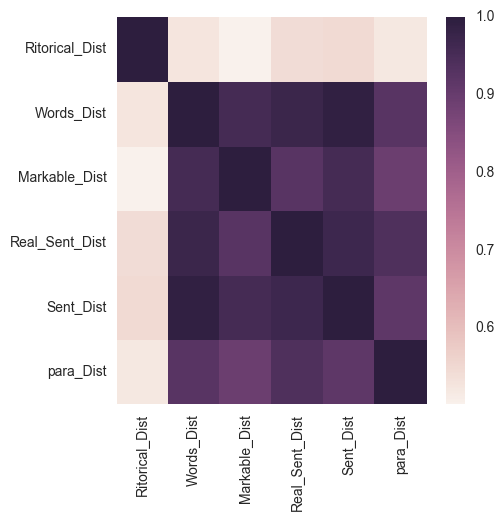

In [44]:
predictors = list(set(ref_df.columns))
corr = ref_df[predictors].corr()
figsize(5, 5)
sns.heatmap(corr)

In [45]:
ref_df.corr()

,Words_Dist,Markable_Dist,Sent_Dist,Ritorical_Dist,Real_Sent_Dist,para_Dist
Words_Dist,1.000000,0.958141,0.990346,0.527407,0.973573,0.925371
Markable_Dist,0.958141,1.000000,0.958566,0.502287,0.924200,0.893898
Sent_Dist,0.990346,0.958566,1.000000,0.548683,0.970164,0.914997
Ritorical_Dist,0.527407,0.502287,0.548683,1.000000,0.543156,0.522707
Real_Sent_Dist,0.973573,0.924200,0.970164,0.543156,1.000000,0.941415
para_Dist,0.925371,0.893898,0.914997,0.522707,0.941415,1.000000


Корреляционная матрица показывает, что наибольшая корреляция наблюдается между такими признаками, как расстояние в словах (Words_dist) и расстоянием в клаузах (Sent_dist). При этом минимальная корреляция выявляется между признаком риторического расстояния (Ritorical_Dist) и всеми остальными признаками расстояний.  

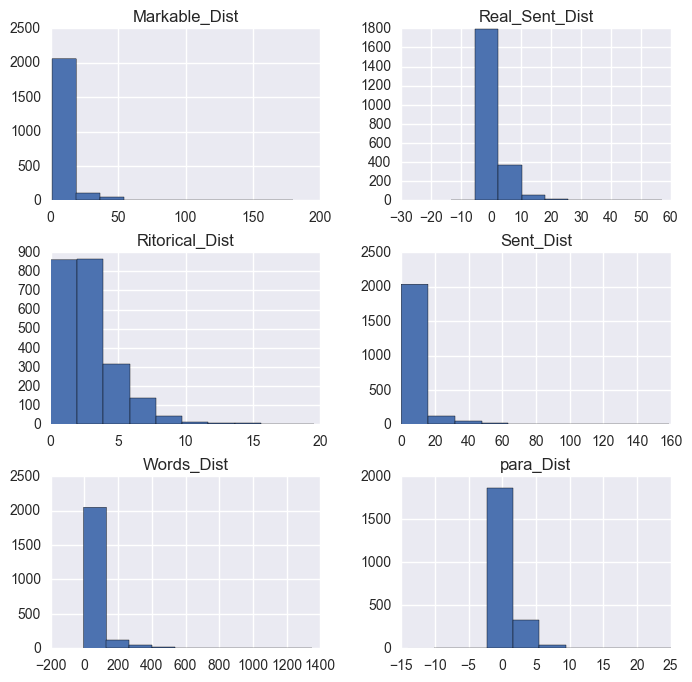

In [46]:
figsize(8, 8)
plots = ref_df[predictors].hist()

## Зависимость между различными расстояниями и формой референциального выражения (res_form)

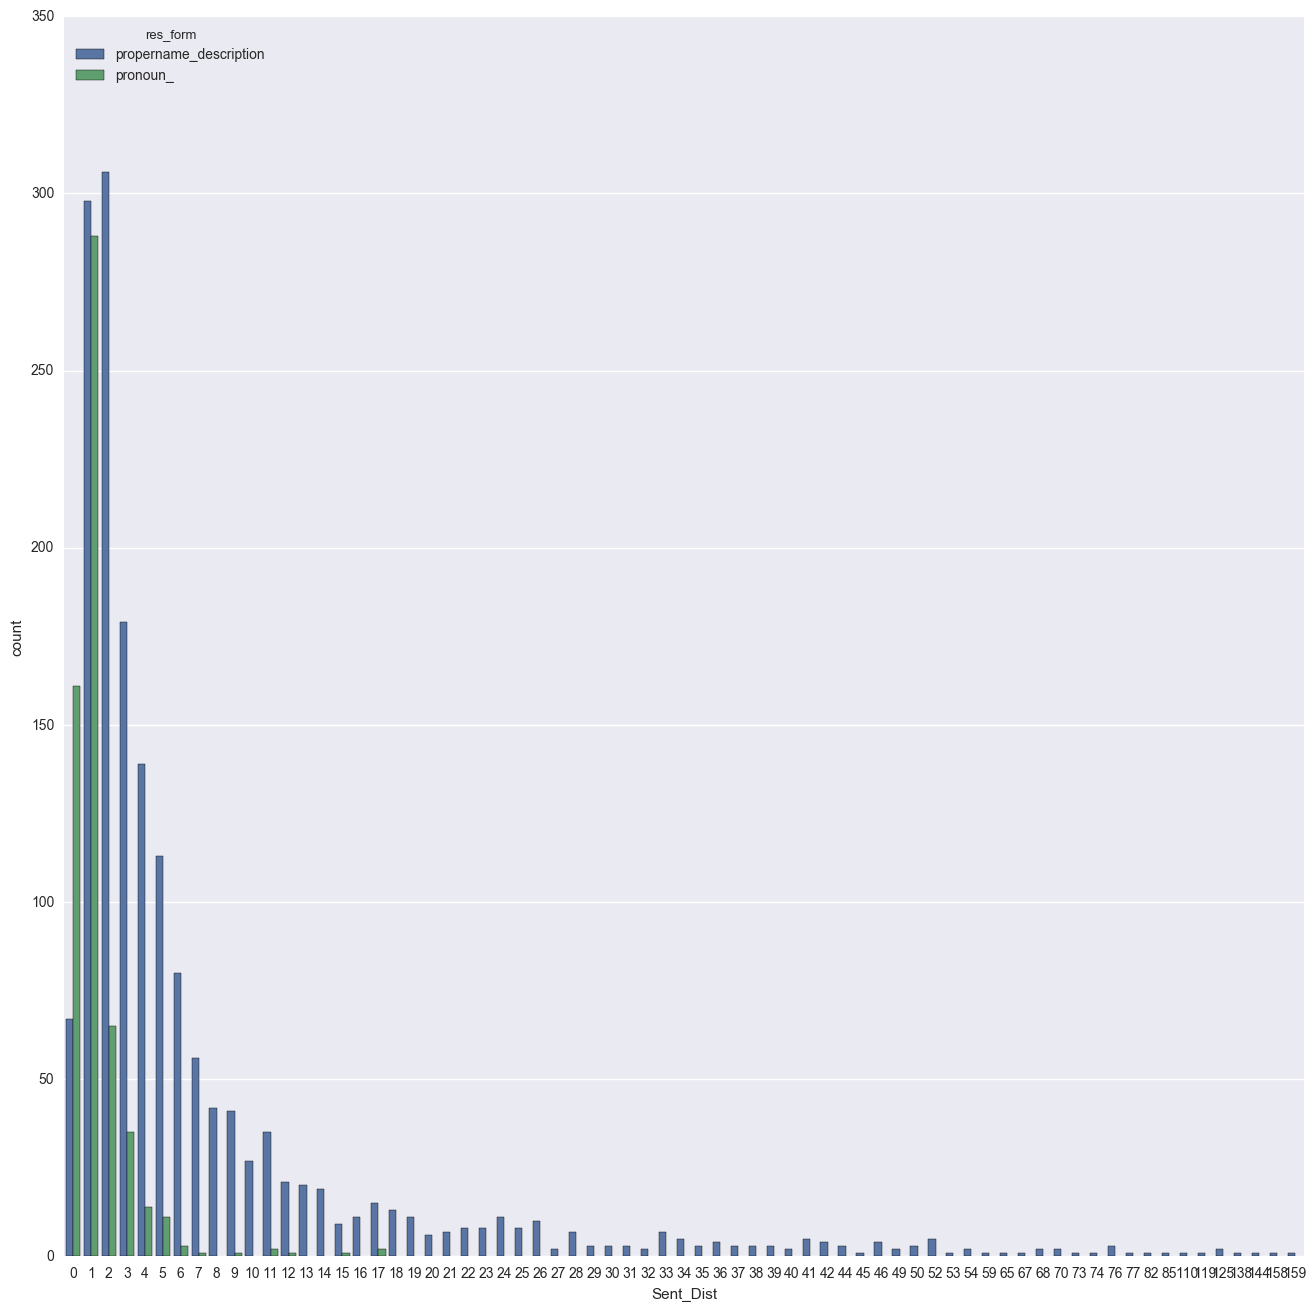

In [47]:
figsize(16, 16)
sns.countplot(x='Sent_Dist', hue='res_form', data=ref_df)

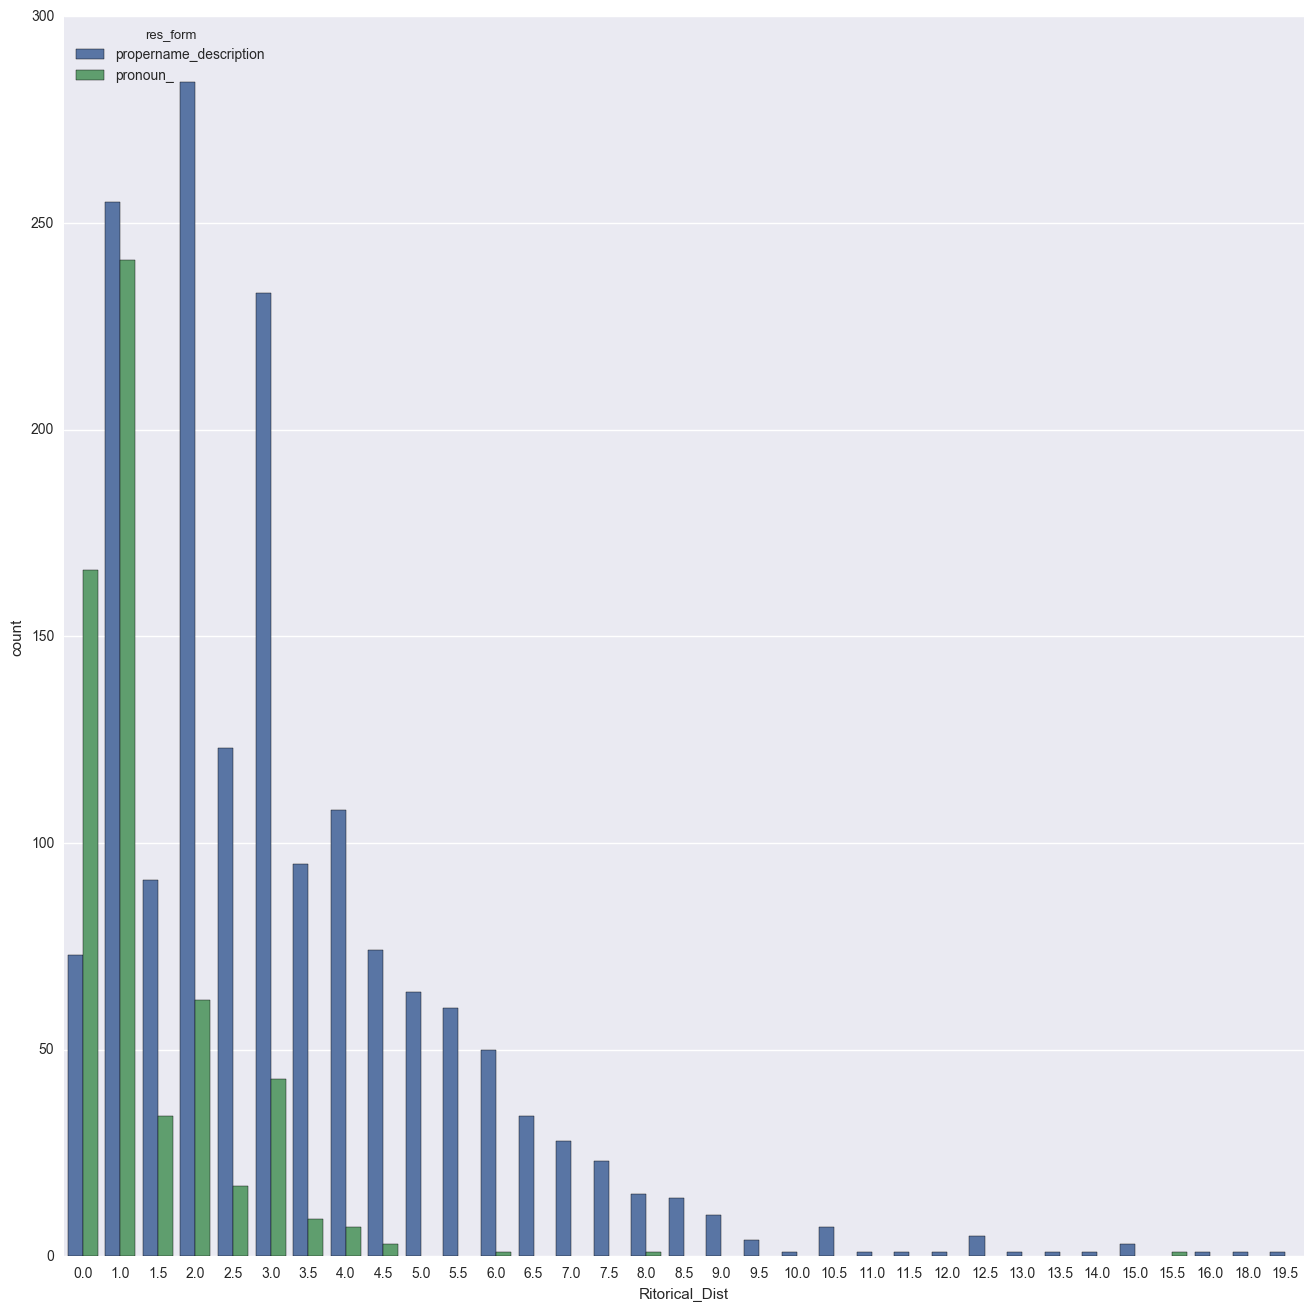

In [48]:
figsize(16, 16)
sns.countplot(x='Ritorical_Dist', hue='res_form', data=ref_df)

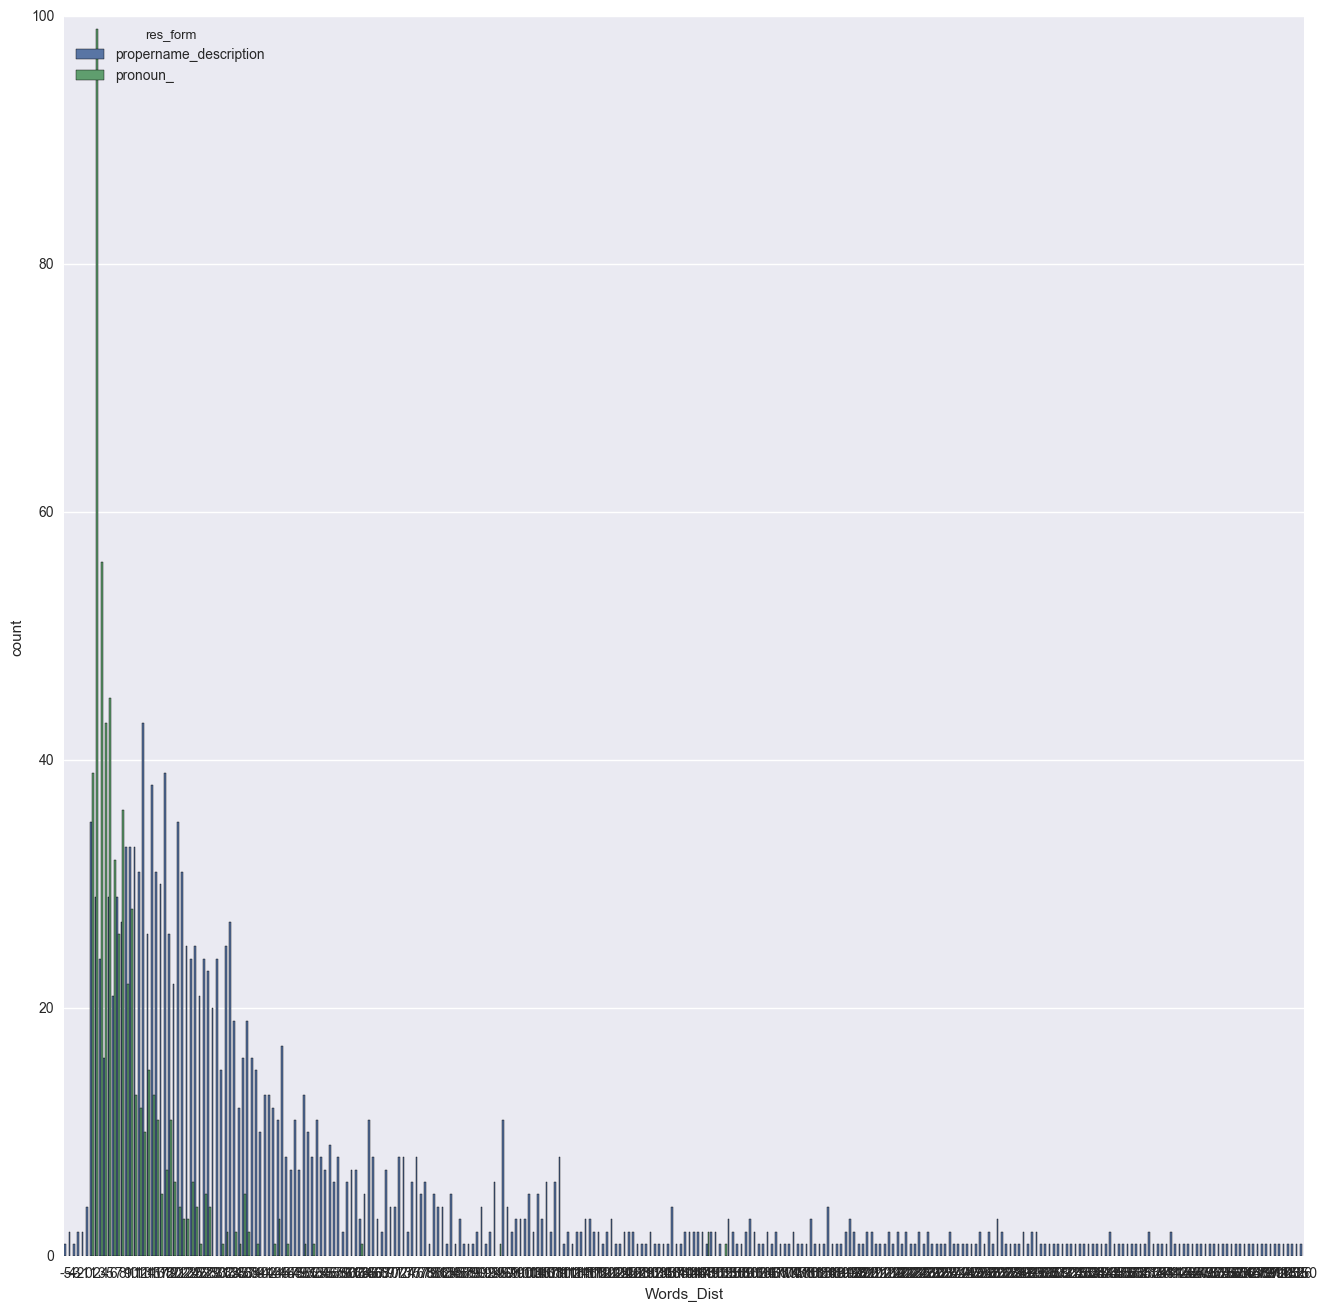

In [49]:
figsize(16, 16)
sns.countplot(x='Words_Dist', hue='res_form', data=ref_df)

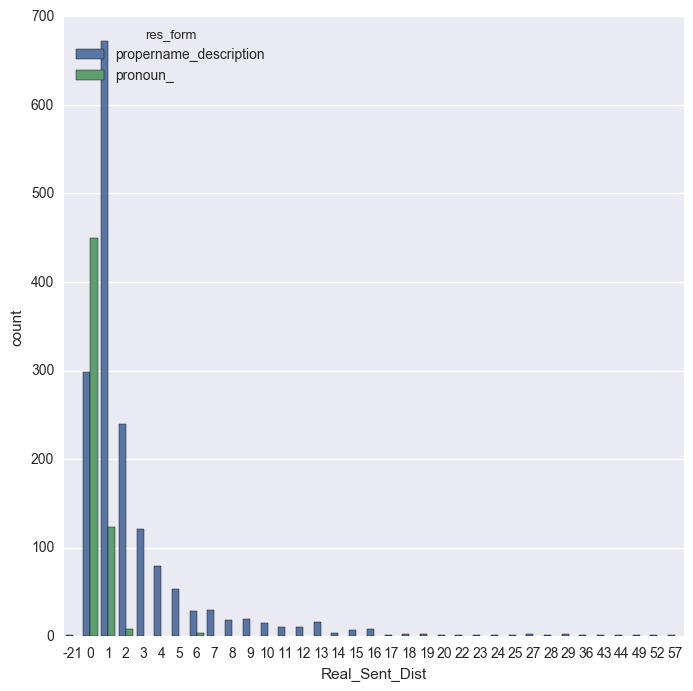

In [50]:
figsize(8, 8)
sns.countplot(x='Real_Sent_Dist', hue='res_form', data=ref_df)

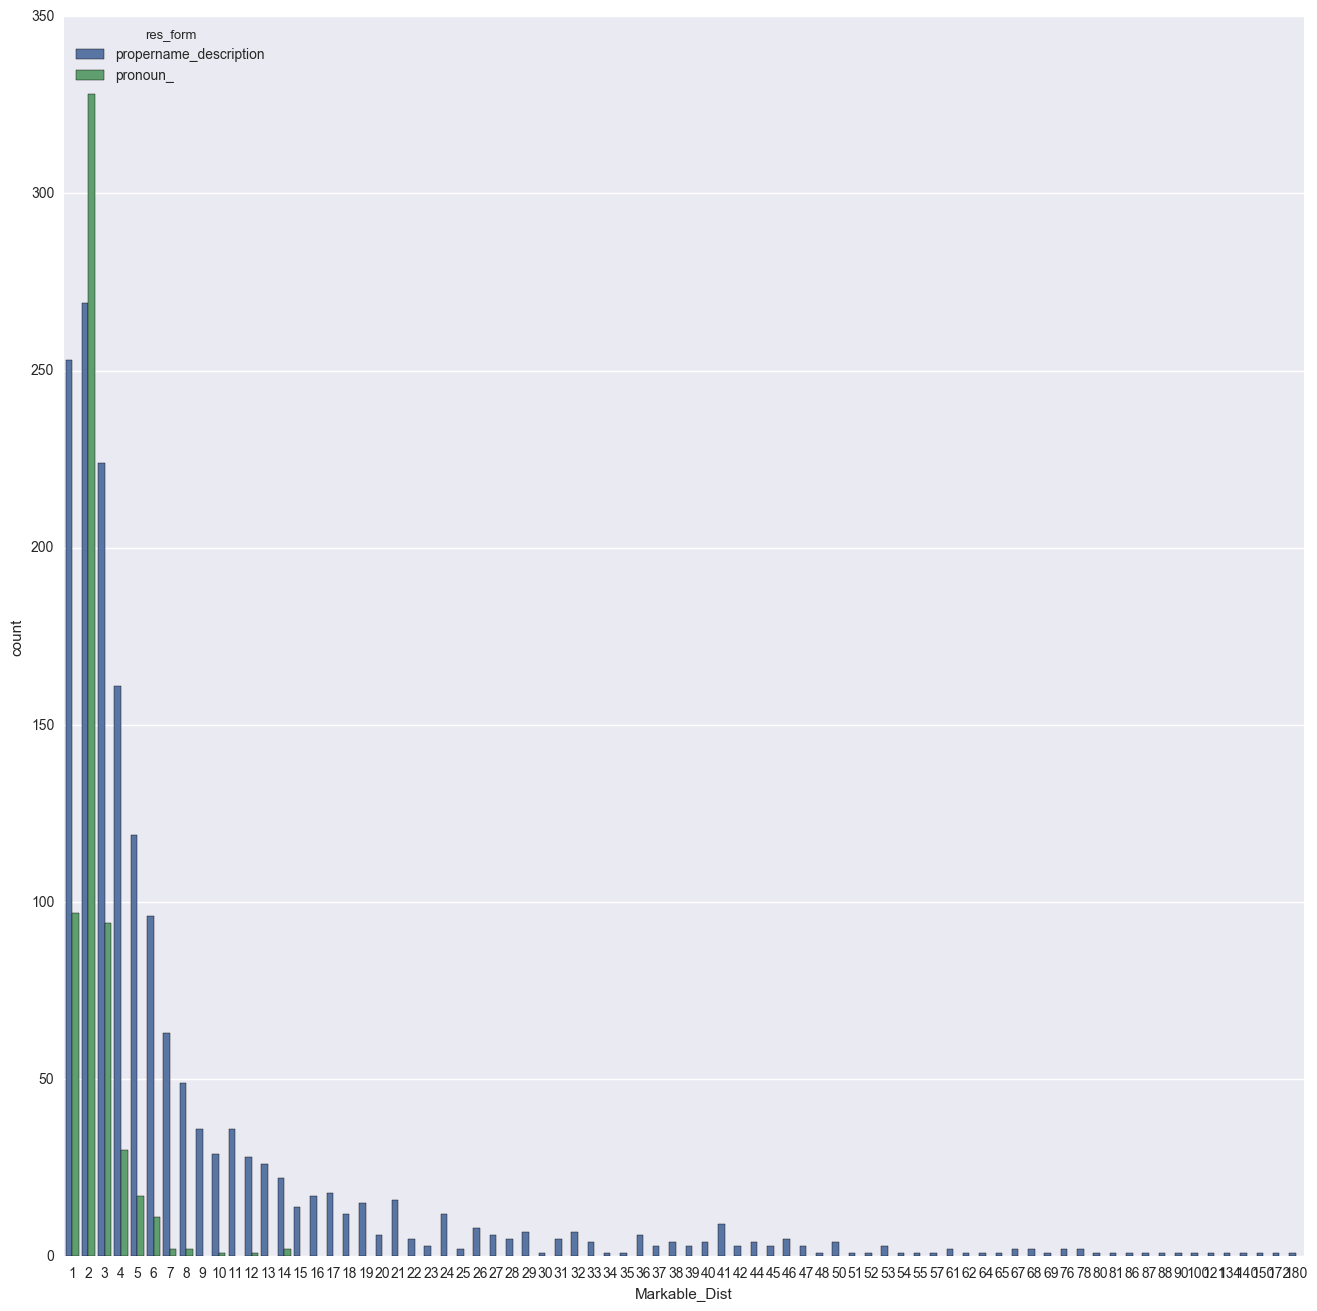

In [51]:
figsize(16, 16)
sns.countplot(x='Markable_Dist', hue='res_form', data=ref_df)

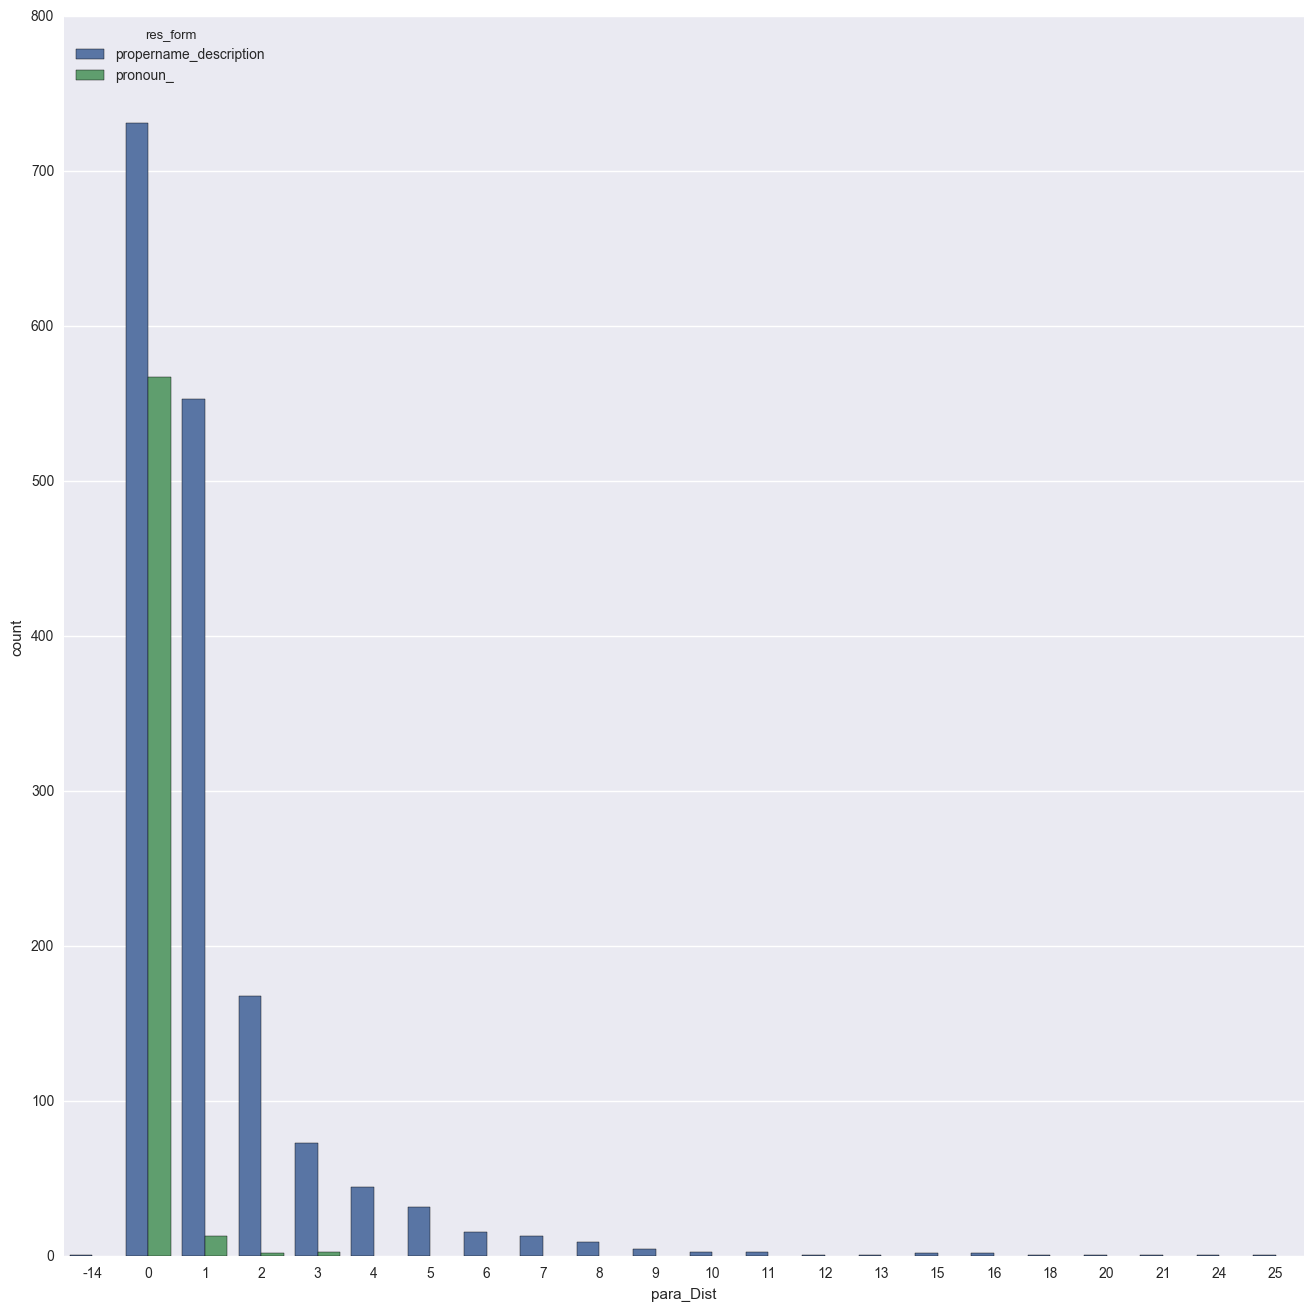

In [52]:
figsize(16, 16)
sns.countplot(x='para_Dist', hue='res_form', data=ref_df)

Как показывают данные гистограммы, с увеличением расстояния между анафором и антецедентом уменьшается число употреблений местоимений. Таким образом, мы можем заключить, что признак расстояния является хорошим для моделирования референциального выбора. 

Еще данные диаграммы выявляют единичные ошибки в наших данных. Например, встречаются отрицательные расстояния (para_Dist=-14). Данные в csv-файл собираются автоматически из корпуса, и такие выбросы связаны с некорректной разметкой корпуса.

## Взаимосвязь признака одушевленности с признаком риторического расстояния

In [85]:
a = ref_df[(ref_df['animacy']=='animate')&
      (ref_df['res_form']=='pronoun_')&
      (ref_df['Ritorical_Dist']>2)].shape[0]
b = ref_df[(ref_df['animacy']=='animate')&
      (ref_df['res_form']=='pronoun_')].shape[0]
print(a/b)

0.21708185053380782


In [86]:
a = ref_df[(ref_df['animacy']=='animate')&
      (ref_df['res_form']=='pronoun_')&
      (ref_df['Ritorical_Dist']<=2)].shape[0]
b = ref_df[(ref_df['animacy']=='animate')&
      (ref_df['res_form']=='pronoun_')].shape[0]
print(a/b)

0.7829181494661922


In [93]:
a = ref_df[((ref_df['animacy']=='inanimate'))&
      (ref_df['res_form']=='pronoun_')&
      (ref_df['Ritorical_Dist']>2)].shape[0]
b = ref_df[((ref_df['animacy']=='inanimate'))&
      (ref_df['res_form']=='pronoun_')].shape[0]
print(a/b)



0.14


In [92]:
a = ref_df[((ref_df['animacy']=='inanimate'))&
      (ref_df['res_form']=='pronoun_')&
      (ref_df['Ritorical_Dist']<=2)].shape[0]
b = ref_df[((ref_df['animacy']=='inanimate'))&
      (ref_df['res_form']=='pronoun_')].shape[0]
print(a/b)


0.86


In [94]:
a = ref_df[((ref_df['animacy']=='collective'))&
      (ref_df['res_form']=='pronoun_')&
      (ref_df['Ritorical_Dist']<=2)].shape[0]
b = ref_df[((ref_df['animacy']=='collective'))&
      (ref_df['res_form']=='pronoun_')].shape[0]
print(a/b)


0.9651741293532339


In [95]:
a = ref_df[((ref_df['animacy']=='collective'))&
      (ref_df['res_form']=='pronoun_')&
      (ref_df['Ritorical_Dist']>2)].shape[0]
b = ref_df[((ref_df['animacy']=='collective'))&
      (ref_df['res_form']=='pronoun_')].shape[0]
print(a/b)

0.03482587064676617


Полученные частоты показывают, что  с увеличением расстояния местоимения употребляются чаще, если референт был одушевленным. Частоты встречаемости одушевленных, неодушевленных и коллективных референтов на риторическом расстоянии, большем 2: 0.21708185053380782, 0.14, 0.03482587064676617.

## Взаимосвязь признака роли антецедента в предложении с признаком риторического расстояния

In [100]:
a = ref_df[((ref_df['ant_gramm_role']=='sbj'))&
      (ref_df['res_form']=='pronoun_')&
      (ref_df['Ritorical_Dist']>2)].shape[0]
b = ref_df[((ref_df['ant_gramm_role']=='sbj'))&
      (ref_df['res_form']=='pronoun_')].shape[0]
print(a/b)

0.14105793450881612


In [101]:
a = ref_df[((ref_df['ant_gramm_role']=='indir_obj')|(ref_df['ant_gramm_role']=='obl')|(ref_df['ant_gramm_role']=='dir_obj'))&
      (ref_df['res_form']=='pronoun_')&
      (ref_df['Ritorical_Dist']>2)].shape[0]
b = ref_df[((ref_df['ant_gramm_role']=='indir_obj')|(ref_df['ant_gramm_role']=='obl')|(ref_df['ant_gramm_role']=='dir_obj'))&
      (ref_df['res_form']=='pronoun_')].shape[0]
print(a/b)

0.11458333333333333


Признак синтаксической роли антецедента является хорошим фактором для предсказания референциального выбора, но он действует только когда антецедент находится на значительном расстоянии от анафора (риторическое растояние больше 2). 